In [200]:
from random import*
import numpy as np
from pylab import*
import matplotlib.pyplot as plt

In [230]:
x=0.1
y=0.1
z=0.1
a=0.1
xn=0.1
zn=0.1
coopa=0.05
coopm=0.05

M0=np.array([[1-x, x, 0], [y, 1-y-z, z], [0, a, 1-a]])
MT=np.array([[-xn, 0, xn], [0 ,-zn ,zn], [0, 0, 0]])
Mcoopa=np.array([[0,0,0],[1,-1,0],[0,1,-1]])
Mcoopm=np.array([[-1,1,0],[0,-1,1],[0,0,0]])

PT=0.05

In [233]:
def evol(nuc,T):
    for i in range(2):
        if T==0:
            r=random()
            if r<=PT:
                nuc[i,1]=1
        if T==1:
            r=random()
            if r<=PT:
                nuc[1]=0
        pourquoifairesimplequandonpeutfairecomplique=[0,1]
        pourquoifairesimplequandonpeutfairecomplique.remove(i)
        j=pourquoifairesimplequandonpeutfairecomplique[0]
        M=M0+nuc[i,1]*MT
        if nuc[j,0]==2:
            M=M0+nuc[i,1]*MT+coopm*Mcoopm
        if nuc[j,0]==0:
            M=M0+nuc[i,1]*MT+coopa*Mcoopa
        r=random()
        if r<=M[nuc[i,0],0] :
            nuc[i,0]=0
        elif r<=(M[nuc[i,0],0]+M[nuc[i,0],1]) :
            nuc[i,0]=1
        else :
            nuc[i,0]=2
    return(nuc)

def simulation(hiver, primptemps,n=35):
    L=np.array([[[0,0],[0,0]] for i in range(n)])
    T=0
    for i in range(hiver):
        for j in range(len(L)):
            L[j]=evol(L[j],T)
    T=1
    for i in range(primptemps):
        for j in range(len(L)):
            L[j]=evol(L[j],T)
    return(L)


In [358]:
evol(np.array([[0,0],[0,0]]),0)

array([[0, 0],
       [1, 0]])

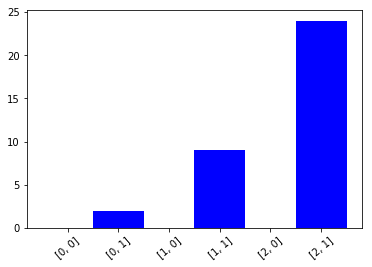

In [212]:
n=simulation(1000, 0)
b=n.count([0, 0])
c=n.count([0, 1])
d=n.count([1, 0])
e=n.count([1, 1])
f=n.count([2, 0])
g=n.count([2, 1])

fig = plt.figure()

h = [1,2,3,4,5,6]
height = [b,c,d,e,f,g]
width = 1.0
BarName = ['[0, 0]','[0, 1]','[1, 0]','[1, 1]','[2, 0]','[2, 1]']

plt.bar(h, height, width, color='b' )

plt.xticks(h, BarName, rotation=40)
plt.savefig('SimpleBar.png')
plt.show()